# Using Reddit's API for Predicting Comments

In this project, we will practice two major skills. Collecting data via an API request and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to what subreddit it belongs to?_

Your method for acquiring the data will be scraping threads from at least two subreddits. 

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts which subreddit a given post belongs to.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. 

*NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:
```python
res = requests.get(URL)
```

This is because Reddit has throttled python's default user agent. You'll need to set a custom `User-agent` to get your request to work.
```python
res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})
```

In [2]:
import requests
import json
import pandas as pd
import time

In [3]:
url = "https://www.reddit.com/r/AskHistorians/.json"

In [4]:
## YOUR CODE HERE
res = requests.get(url, headers = {'User-agent': 'project_3'} )

In [5]:
res

<Response [200]>

In [6]:
# from bs4 import BeautifulSoup

# res = BeautifulSoup(res.content, 'lxml')

#### Use `res.json()` to convert the response into a dictionary format and set this to a variable. 

```python
data = res.json()
```

In [7]:
res_data = res.json()

In [8]:
# res_data.keys()

# res_data['kind']

# res_data['data'].keys()

In [9]:
#res_data['data']['children']

#### Getting more results

By default, Reddit will give you the top 25 posts:

```python
print(len(data['data']['children']))
```

If you want more, you'll need to do two things:
1. Get the name of the last post: `data['data']['after']`
2. Use that name to hit the following url: `http://www.reddit.com/r/boardgames.json?after=THE_AFTER_FROM_STEP_1`
3. Create a loop to repeat steps 1 and 2 until you have a sufficient number of posts. 

*NOTE*: Reddit will limit the number of requests per second you're allowed to make. When you create your loop, be sure to add the following after each iteration.

```python
time.sleep(3) # sleeps 3 seconds before continuing```

This will throttle your loop and keep you within Reddit's guidelines. You'll need to import the `time` library for this to work!

In [10]:
## YOUR CODE HERE
print(len(res_data['data']['children']))

27


In [11]:
# res_data['data']['children'][0].keys()

# label = res_data['data']['children'][0]['data']['subreddit']

# res_data['data']['children'][0]['data']['title']

# selftext = res_data['data']['children'][0]['data']['selftext']

# # Getting the name of the last post:
# res_data['data']['after']

# posts = [post['data'] for post in res_data['data']['children']]

# name = pd.DataFrame(posts)['name']

# res_data['data']['after']

# url + '?after' + res_data['data']['after']

In [12]:
posts = []
after = None
url = "https://www.reddit.com/r/AskHistorians/.json"

for i in range(40):
    #update url
    if after == None:
        current_url = url
    else: 
        current_url = url + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers = {'User-agent': 'project_3.1'})
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts.extend(current_posts)
    after = current_dict['data']['after']
    
    df = pd.DataFrame(posts)
    df.to_csv('AskHistorians.csv', index=False)
    
    if i > 0:
        prev_posts = pd.read_csv('AskHistorians.csv')
        current_df = pd.DataFrame(prev_posts)
    else:
        pd.DataFrame(posts).to_csv('AskHistorians.csv', index=False)

    
    time.sleep(3)

https://www.reddit.com/r/AskHistorians/.json
https://www.reddit.com/r/AskHistorians/.json?after=t3_9euo2f
https://www.reddit.com/r/AskHistorians/.json?after=t3_9et1rd
https://www.reddit.com/r/AskHistorians/.json?after=t3_9eohvl
https://www.reddit.com/r/AskHistorians/.json?after=t3_9eqwpi
https://www.reddit.com/r/AskHistorians/.json?after=t3_9enpv3
https://www.reddit.com/r/AskHistorians/.json?after=t3_9ekukk
https://www.reddit.com/r/AskHistorians/.json?after=t3_9eme9b
https://www.reddit.com/r/AskHistorians/.json?after=t3_9eidsj
https://www.reddit.com/r/AskHistorians/.json?after=t3_9edof3
https://www.reddit.com/r/AskHistorians/.json?after=t3_9ee6tn
https://www.reddit.com/r/AskHistorians/.json?after=t3_9ecft6
https://www.reddit.com/r/AskHistorians/.json?after=t3_9e79u8
https://www.reddit.com/r/AskHistorians/.json?after=t3_9e7ftb
https://www.reddit.com/r/AskHistorians/.json?after=t3_9e9omn
https://www.reddit.com/r/AskHistorians/.json?after=t3_9dyayo
https://www.reddit.com/r/AskHistorians/.

In [13]:
len(posts)

996

In [14]:
current_df.head()

,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,suggested_sort,thumbnail,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,NaN,...,random,NaN,Sunday Digest | Interesting &amp; Overlooked P...,29,https://www.reddit.com/r/AskHistorians/comment...,[],NaN,False,all_ads,6
1,NaN,NaN,False,jschooltiger,NaN,NaN,moderator,[],NaN,Moderator | Shipbuilding and Logistics | Briti...,...,NaN,NaN,Panel AMA: Sailors &amp; Sailing from Ancient ...,98,https://www.reddit.com/r/AskHistorians/comment...,[],NaN,False,all_ads,6
2,NaN,NaN,False,Mackteague,NaN,NaN,NaN,[],NaN,NaN,...,NaN,NaN,Why did the USSR go from completely legalizing...,762,https://www.reddit.com/r/AskHistorians/comment...,[],NaN,False,all_ads,6
3,NaN,NaN,False,sonictitties,NaN,NaN,NaN,[],NaN,NaN,...,NaN,NaN,Why did Shields tend to be circular?,405,https://www.reddit.com/r/AskHistorians/comment...,[],NaN,False,all_ads,6
4,NaN,NaN,False,Imacatdoincatstuff,NaN,NaN,NaN,[],NaN,NaN,...,NaN,NaN,Why did the Europeans build their castles and ...,145,https://www.reddit.com/r/AskHistorians/comment...,[],NaN,False,all_ads,6


In [15]:
len(current_df)

996

In [16]:
current_df = current_df.drop_duplicates()

In [17]:
len(current_df)

996

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [18]:
# Export to csv
current_df.to_csv('AskHistorians_clean.csv', index=False)

In [19]:
# # Importing both datasets and merging them together.
askHistorians = pd.read_csv('AskHistorians_clean.csv')
todayILearned = pd.read_csv('TodayILearned_clean.csv')


In [20]:
askHistorians.columns

Index(['approved_at_utc', 'approved_by', 'archived', 'author',
       'author_cakeday', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'banned_at_utc', 'banned_by', 'can_gild', 'can_mod_post', 'category',
       'clicked', 'content_categories', 'contest_mode', 'created',
       'created_utc', 'distinguished', 'domain', 'downs', 'edited', 'gilded',
       'hidden', 'hide_score', 'id', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_self', 'is_video',
       'likes', 'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_only', 'mod_note', 'mod_reason_by',
       'mod_reason_title', 'mod_reports',

In [21]:
df_askHistorians = askHistorians[['title', 'subreddit']]

In [22]:
df_todayILearned = todayILearned[['title','subreddit']]

In [23]:
df_askHistorians.head()

,title,subreddit
0,Sunday Digest | Interesting &amp; Overlooked P...,AskHistorians
1,Panel AMA: Sailors &amp; Sailing from Ancient ...,AskHistorians
2,Why did the USSR go from completely legalizing...,AskHistorians
3,Why did Shields tend to be circular?,AskHistorians
4,Why did the Europeans build their castles and ...,AskHistorians


In [24]:
df_todayILearned.head()

,title,subreddit
0,TIL that libraries in Los Angeles have done aw...,todayilearned
1,TIL that Japanese hornets can grow up to the s...,todayilearned
2,"TIL about Otto, an octopus that was able to cl...",todayilearned
3,TIL There are whales alive today who were born...,todayilearned
4,TIL that because the character of Montgomery S...,todayilearned


In [25]:
# Joining titles and subreddits of both sets into on data frame.
df = pd.concat([df_askHistorians, df_todayILearned])

In [26]:
df.reset_index(drop=True).head()

,title,subreddit
0,Sunday Digest | Interesting &amp; Overlooked P...,AskHistorians
1,Panel AMA: Sailors &amp; Sailing from Ancient ...,AskHistorians
2,Why did the USSR go from completely legalizing...,AskHistorians
3,Why did Shields tend to be circular?,AskHistorians
4,Why did the Europeans build their castles and ...,AskHistorians


In [27]:
# Creating a binary feature with 'is_AskHistorians' as 1 and 'is_todayilearned' as 0
df['is_AskHistorians'] = df['subreddit'].map(lambda x: 1 if x == 'AskHistorians' else 0)
df.head(3)

,title,subreddit,is_AskHistorians
0,Sunday Digest | Interesting &amp; Overlooked P...,AskHistorians,1
1,Panel AMA: Sailors &amp; Sailing from Ancient ...,AskHistorians,1
2,Why did the USSR go from completely legalizing...,AskHistorians,1


In [28]:
df['is_AskHistorians'].value_counts()

1    996
0    994
Name: is_AskHistorians, dtype: int64

In [29]:
df['is_AskHistorians'].value_counts(normalize=True)

1    0.500503
0    0.499497
Name: is_AskHistorians, dtype: float64

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

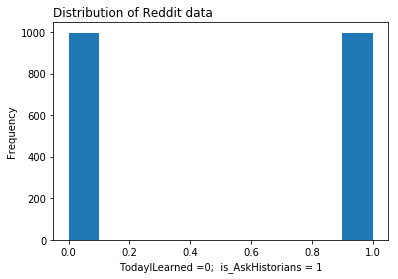

In [31]:
plt.hist(df['is_AskHistorians']);
plt.xlabel("TodayILearned =0;  is_AskHistorians = 1") # (x,y)
plt.ylabel("Frequency")
plt.title("Distribution of Reddit data", position = (0,1), ha = 'left');
plt.savefig('Reddit_distribution.png')

## NLP

#### Use `CountVectorizer` or `TfidfVectorizer` from scikit-learn to create features from the thread titles and descriptions (NOTE: Not all threads have a description)
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

##### Split our data into training and testing sets

In [32]:
X = df['title']
y = df['subreddit']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

##### Using countVectorizer on our corpus

In [34]:
## YOUR CODE HERE
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# Using count vectorizer
cvt = CountVectorizer(analyzer='word',stop_words='english')
cvt.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [36]:
X_train_cvt = cvt.transform(X_train)

X_test_cvt = cvt.transform(X_test)

In [37]:
# #Convert to an array to get features names
X_train_cvt = X_train_cvt.toarray()
# X_train_set_array = cvt.get_feature_names()
# print(X_train_set_array)

In [38]:
# Change to a data frame to get feature names.
X_train_cvt = pd.DataFrame(X_train_cvt, columns=cvt.get_feature_names())

In [39]:
X_train_cvt.head(3)

,000,03,05,06,08,09,10,100,1000,100bc,...,yugoslavia,zacatecas,zealand,zelda,zeppelin,zeppelins,zeptojoules,zero,zimbabwe,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### TfidfVectorizer corpus

In [40]:
X = df['title']
y = df['subreddit']

In [41]:
# Initialize TfidfVectorizer to a new variable.
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tfidf = TfidfVectorizer(stop_words='english')

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [43]:
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [44]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [45]:
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names())

In [46]:
tfidf_df.head()

,000,03,05,06,08,09,10,100,1000,100bc,...,yugoslavia,zacatecas,zealand,zelda,zeppelin,zeppelins,zeptojoules,zero,zimbabwe,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Thought experiment: What is the baseline accuracy for this model?

#### Forming a baseline with a Simple model  - naive Bayes count vectorized data:

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
X_train_cvt.shape

y_train.shape

X_test_cvt.shape

(498, 6637)

In [49]:
nb = MultinomialNB()
model_nb = nb.fit(X_train_cvt, y_train)

In [50]:
model_nb.score(X_train_cvt, y_train), model_nb.score(X_test_cvt, y_test)

(0.9966487935656837, 0.9417670682730924)

#### Forming a baseline with a Simple model  - naive Bayes - TfidfVectorizer data:

In [51]:
print(X_train_tfidf.shape)
print(y_train.shape)

print(X_test_tfidf.shape)

(1492, 6637)
(1492,)
(498, 6637)


In [52]:
nb = MultinomialNB()
model_nb = nb.fit(X_train_tfidf, y_train)

In [53]:
model_nb.score(X_train_tfidf, y_train), model_nb.score(X_test_tfidf, y_test)

(0.9932975871313673, 0.9176706827309237)

## Predicting subreddit using Random Forests + Another Classifier

In [54]:
## YOUR CODE HERE - Using Random Forests with count Vectorized Features
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier()

rfc.fit(X_train_cvt, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
rfc.score(X_train_cvt, y_train), rfc.score(X_test_cvt, y_test)

(1.0, 0.9979919678714859)

#### Most Valuable Features

In [57]:
cvt.get_feature_names()[:5] # .get_feature_names() is a method from CountVectorizer

['000', '03', '05', '06', '08']

In [58]:
X_train_cv_with_y = pd.DataFrame(X_train_cvt, columns=cvt.get_feature_names())
X_train_cv_with_y['what_subreddit'] = y_train.values

In [59]:
X_train_cv_with_y.head(3)

,000,03,05,06,08,09,10,100,1000,100bc,...,zacatecas,zealand,zelda,zeppelin,zeppelins,zeptojoules,zero,zimbabwe,zumba,what_subreddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AskHistorians
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,todayilearned
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,todayilearned


In [60]:
X_train_cv_with_y.groupby('what_subreddit').sum()

,000,03,05,06,08,09,10,100,1000,100bc,...,yugoslavia,zacatecas,zealand,zelda,zeppelin,zeppelins,zeptojoules,zero,zimbabwe,zumba
what_subreddit,,,,,,,,,,,,,,,,,,,,,
AskHistorians,0,1,1,1,1,1,2,2,0,1,...,4,1,1,0,0,0,0,1,0,0
todayilearned,30,0,0,0,0,0,13,8,2,0,...,0,0,3,2,1,1,2,0,1,1


In [61]:
feature_importances_df = pd.DataFrame({
    'feature importances' : rfc.feature_importances_,
    'words': cvt.get_feature_names()
}).set_index('words')

In [62]:
#top_features['feature importances']
feature_groupby_sums = X_train_cv_with_y.groupby('what_subreddit').sum().T
feature_groupby_sums.reset_index(inplace=True)
feature_groupby_sums.rename(columns={'index': 'words'}, inplace=True)

In [63]:
feature_groupby_sums.head(3)

what_subreddit,words,AskHistorians,todayilearned
0,000,0,30
1,03,1,0
2,05,1,0


In [64]:
feature_importances_df.head(3)

,feature importances
words,
000,0.004187
03,0.000000
05,0.000000


In [65]:
feature_words = pd.merge(feature_groupby_sums, feature_importances_df, on='words').set_index('words')

In [66]:
feature_words.head(6)

,AskHistorians,todayilearned,feature importances
words,,,
000,0,30,0.004187
03,1,0,0.000000
05,1,0,0.000000
06,1,0,0.000000
08,1,0,0.000000
09,1,0,0.000000


In [67]:
# Top feature important words
feature_words.sort_values('feature importances', ascending=False)[:6]

,AskHistorians,todayilearned,feature importances
words,,,
til,0,745,0.561505
did,269,11,0.036124
film,1,37,0.006494
called,5,41,0.006463
war,59,18,0.005962
know,30,3,0.005405


In [68]:
# Top todayILearned words
feature_words.sort_values('todayilearned', ascending=False)[:6]

,AskHistorians,todayilearned,feature importances
words,,,
til,0,745,0.561505
world,25,52,0.002213
called,5,41,0.006463
people,44,40,0.000395
film,1,37,0.006494
years,14,36,0.001085


In [69]:
# Top AskHistorians words
feature_words.sort_values('AskHistorians', ascending=False)[:6]

,AskHistorians,todayilearned,feature importances
words,,,
did,269,11,0.036124
war,59,18,0.005962
like,54,22,0.003270
roman,45,4,0.005251
people,44,40,0.000395
empire,39,6,0.003503


In [70]:
# least feature important words

feature_words.sort_values('feature importances', ascending=True)[:6]

,AskHistorians,todayilearned,feature importances
words,,,
julian,1,0,0.0
outer,0,1,0.0
ottomans,3,0,0.0
otter,0,1,0.0
ostrogoths,1,0,0.0
osterby,0,1,0.0


In [71]:
# The sum of occurance of each word.
# X_train_cvt.sum()['til']

# X_train_cvt.sum()['michigan']

#### Visualizing Top Feature important Words

In [72]:
from IPython.display import Image


import pydotplus
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

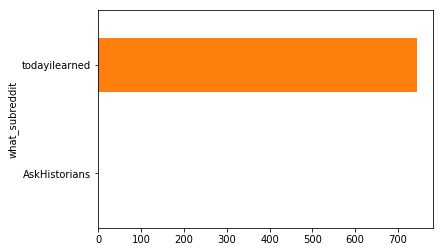

In [73]:
X_train_cv_with_y.groupby('what_subreddit').sum()['til'].plot(kind='barh')

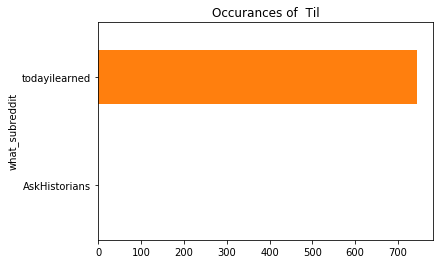

In [74]:
def plot_word_from_groupby(word, df=X_train_cv_with_y):
    X_train_cv_with_y.groupby('what_subreddit').sum()[word].plot(kind='barh')
    plt.title(f'Occurances of  {word.title()}')
    plt.show()
plot_word_from_groupby('til')

In [75]:
X_train_cv_with_y.sum()['til']

745

In [77]:
top_feature_words = list(X_train_cv_with_y.drop('what_subreddit', axis=1).sum().sort_values(ascending=False)[:10].index)
top_feature_words

['til',
 'did',
 'people',
 'world',
 'war',
 'like',
 'time',
 'used',
 'years',
 'american']

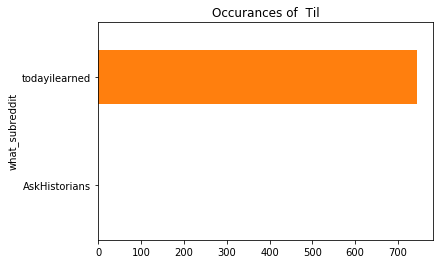

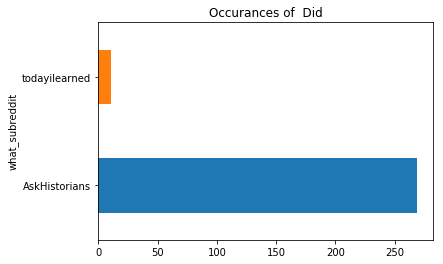

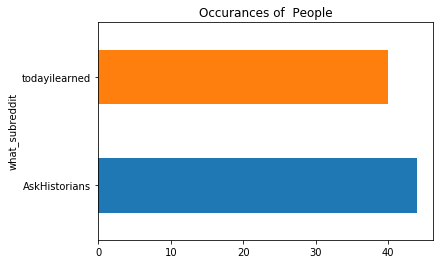

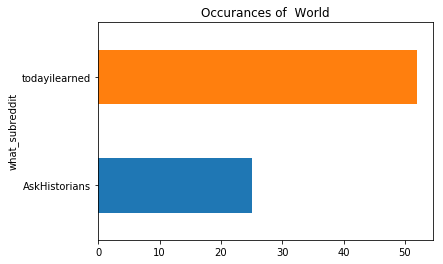

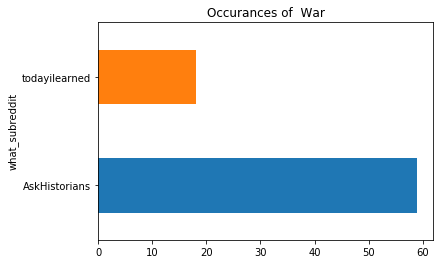

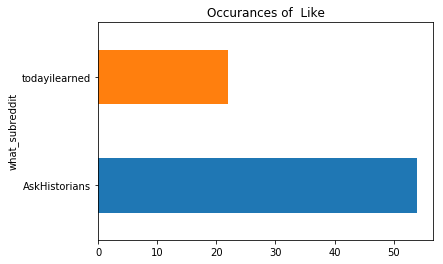

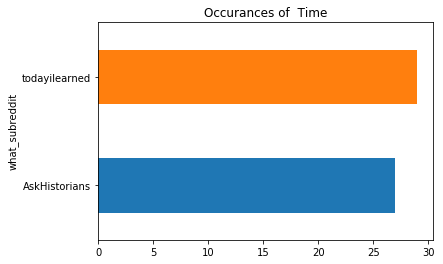

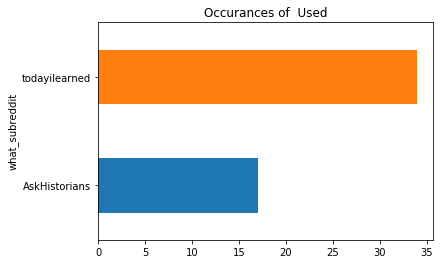

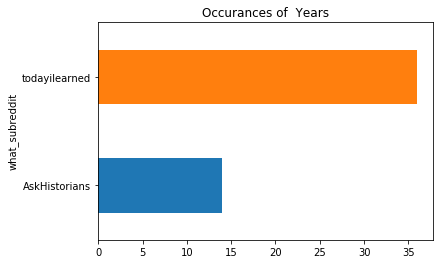

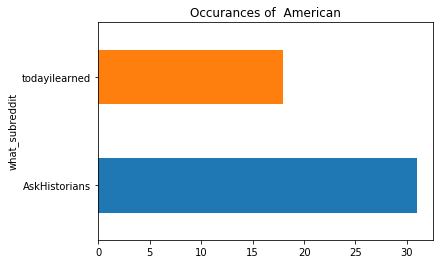

In [80]:
# Top AskHistorians words
for word in top_feature_words:
    plot_word_from_groupby(word)


#### Create a `RandomForestClassifier` model to predict which subreddit a given post belongs to.

In [78]:
rfc_predictions = rfc.predict(X_train_cvt)

In [79]:
#rfc_predictions = pd.DataFrame(rfc.predict(X_test_cvt))

In [80]:
rfc_probabilities = pd.DataFrame(rfc.predict_proba(X_test_cvt))[1]

In [81]:
len(rfc.predict(X_test_cvt))

len(rfc_probabilities)

len(X_test)

498

In [82]:
rfc_pred_df = pd.DataFrame({
    'rfc_predictions': rfc.predict(X_test_cvt),
    'rfc_probabilities': rfc_probabilities,
    'text': X_test.values
})

In [83]:
rfc_pred_df.head()

,rfc_predictions,rfc_probabilities,text
0,AskHistorians,0.0,In ancient societies was hearing people having...
1,todayilearned,1.0,TIL that because the character of Montgomery S...
2,AskHistorians,0.0,"If Saddam Hussein was so anti-communist, then ..."
3,todayilearned,0.9,TIL that Tsunamis occasionally occur on Lake M...
4,todayilearned,1.0,"TIL About RHnull, a blood type so rare that it..."


#### We want to predict a binary variable - class `0` for one of your subreddits and `1` for the other.

In [84]:
## YOUR CODE HERE
# Using logistic regresstion with count Vectorized features
from sklearn.linear_model import LogisticRegression


In [85]:
lr = LogisticRegression()
X_train_lr = lr.fit(X_train_cvt, y_train)

In [86]:
X_train_lr.score(X_train_cvt, y_train), X_train_lr.score(X_test_cvt, y_test)

(0.999330207635633, 1.0)

In [87]:
lr_predictions, lr_probabilities = X_train_lr.predict(X_test_cvt), X_train_lr.predict_proba(X_test_cvt)

In [88]:
lr_predictions[:10]

array(['AskHistorians', 'todayilearned', 'AskHistorians', 'todayilearned',
       'todayilearned', 'todayilearned', 'todayilearned', 'todayilearned',
       'AskHistorians', 'todayilearned'], dtype=object)

In [89]:
lr_predictions[0]

'AskHistorians'

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 
- **Bonus**: Use `GridSearchCV` with `Pipeline` to optimize your `CountVectorizer`/`TfidfVectorizer` and classification model.

In [90]:
## YOUR CODE HERE
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegressionCV

C:\Users\install\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [91]:
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores(df['title'].iloc[2]))
print(df['title'].iloc[2])

{'neg': 0.045, 'neu': 0.767, 'pos': 0.188, 'compound': 0.8173}
Why did Alexander the Great begin to persian-ify himself, choosing persian advisors and taking most of persian customs? Why did he view the persian culture so highly despite growing around the time of the most brilliant greek minds?


In [92]:
# #whole score

# polarity = []

# for each in df['title']:
#     polarity.append(sia.polarity_scores(each))
    
# len(polarity)
# print(df['title'].iloc[2])
# print(polarity[2])
# df_polarity = pd.DataFrame(polarity)
# df_polarity.head()

In [93]:
def get_compound(line):
    return sia.polarity_scores(line)['compound']

polarity = []

for each in X_train:
    polarity.append(get_compound(each))
    
len(polarity)
polarity[2] #polarity of line at index 2

0.3612

In [94]:
df_polarity = pd.DataFrame(polarity)

In [95]:
df_polarity.head() 

,0
0,0.0000
1,0.0000
2,0.3612
3,-0.8689
4,0.0000


In [96]:
df_polarity['what_subreddit'] = y_train.values

In [97]:
df_polarity['X_train'] = X_train.values

In [98]:
df_polarity.head()

,0,what_subreddit,X_train
0,0.0000,AskHistorians,"In 1945, did the US every consider giving Japa..."
1,0.0000,todayilearned,TIL that the third-oldest river in the world i...
2,0.3612,todayilearned,TIL Canadian comedy duo Wayne &amp; Shuster ho...
3,-0.8689,AskHistorians,How was the Ottomans able to pour men into the...
4,0.0000,todayilearned,TIL that the voice actor behind HAL 9000 in 20...


In [99]:
#rename 0 to 'compound' polarity
df_polarity.rename(columns={'index': 'polarity'}, inplace=True)

In [100]:
df_polarity.head()

,0,what_subreddit,X_train
0,0.0000,AskHistorians,"In 1945, did the US every consider giving Japa..."
1,0.0000,todayilearned,TIL that the third-oldest river in the world i...
2,0.3612,todayilearned,TIL Canadian comedy duo Wayne &amp; Shuster ho...
3,-0.8689,AskHistorians,How was the Ottomans able to pour men into the...
4,0.0000,todayilearned,TIL that the voice actor behind HAL 9000 in 20...


In [101]:
# Todayilearned has a more positive sentiment than AskHistorians
# This is surpising because one would expect that there are more negative words 
# used today than in history. 
# Another consideration could be that the negative sentiments in AskHistorians 
# reddit is as a result of the wars that has occured in history as opposed to 
# today. 
df_polarity.groupby('what_subreddit').mean()

,0
what_subreddit,
AskHistorians,-0.019532
todayilearned,-0.010909


In [102]:
class CompoundScore(BaseEstimator, TransformerMixin):
    
    #sia = SentimentIntensityAnalyzer()
    
    def __init__(self):
        self.sia = SentimentIntensityAnalyzer() #The proper way to instantiate
        pass
    
    def get_compound(self, line):
        return sia.polarity_scores(line)['compound']
    
    def transform(self, df):
        return np.array(df.apply(self.get_compound)).reshape(-1,1)
    
    def fit(self, df, y=None):
        return self

In [103]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('cs', CompoundScore()),
    ('clr', LogisticRegression())
])

In [104]:
grid_params ={
    'cv__stop_words': ['english'],
    'clr__penalty': ['l1','l2'], # l2 is ridge which is default, l1 is lasso
    'clr__solver': ['liblinear'],
    'clr__C': np.logspace(-5, 0, 100)
}

In [105]:
gs = GridSearchCV(pipe, grid_params, n_jobs=-1, verbose=2, cv=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

#### Repeat the model-building process using a different classifier (e.g. `MultinomialNB`, `LogisticRegression`, etc)

In [106]:
## YOUR CODE HERE
# Using KneighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [108]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [109]:
X_train_cvt.shape
#y.shape

(1493, 6564)

In [110]:
# Using train features from countVectorizer 
knn.fit(X_train_cvt, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [111]:
## In general, we want to score on the test data!
knn.score(X_train_cvt, y_train), knn.score(X_test_cvt.todense(), y_test)

(0.724045545880777, 0.5522088353413654)

# Executive Summary
---
Put your executive summary in a Markdown cell below.

There is a Strong correlation between the reddit AsKHistorians and TodayILearnt. The most important words are 'til' and 'did' with 'til showing up 745 times and least important words are 'evian' and 'michigan' showing up just once in the corpus.